# Identifying sentences that convey meaningful semantic relation between entities within the sentence - Exploratory Data Analysis (EDA)


The objective of this notebook is to present a brief exploratory data analysis (EDA) of the sampled dataset that will be later used.

In [39]:
from IPython.display import Image
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

## Part 1: Named Entities EDA

The Named Entities analysis was conducted during the dataset generation.
The distribution of named entity occurances, along with their corresponding labels, follows a heavy-tail distibution pattern, as can be seen below:

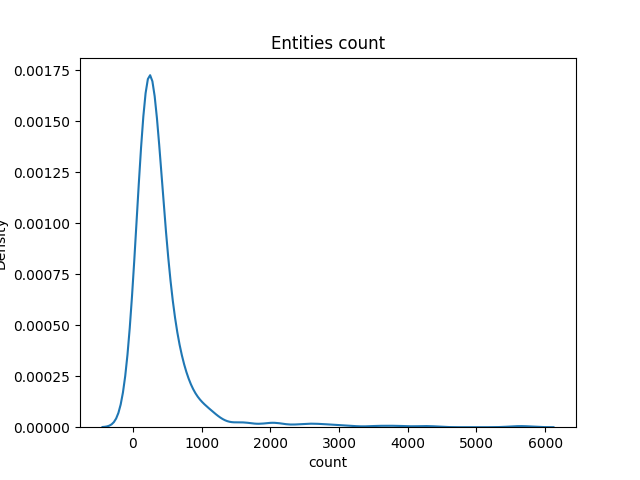

In [40]:
Image(filename='../part1/script_output/sampled_sentences_stats/entities_count.png')

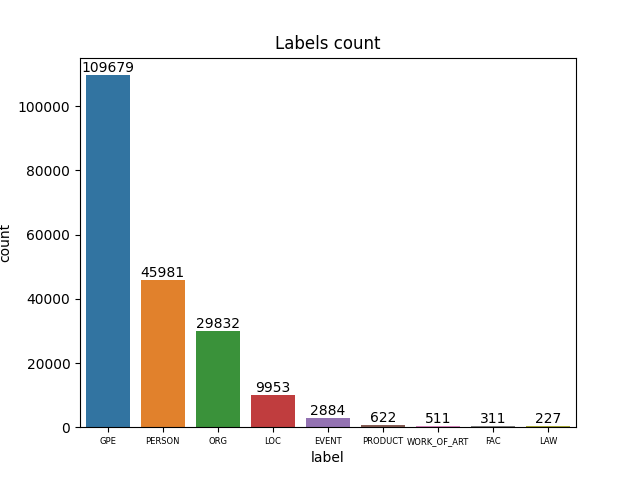

In [41]:
Image(filename='../part1/script_output/sampled_sentences_stats/labels_count.png')

We can see that Named-entities pairs follow a heavy-tail distibution as well:

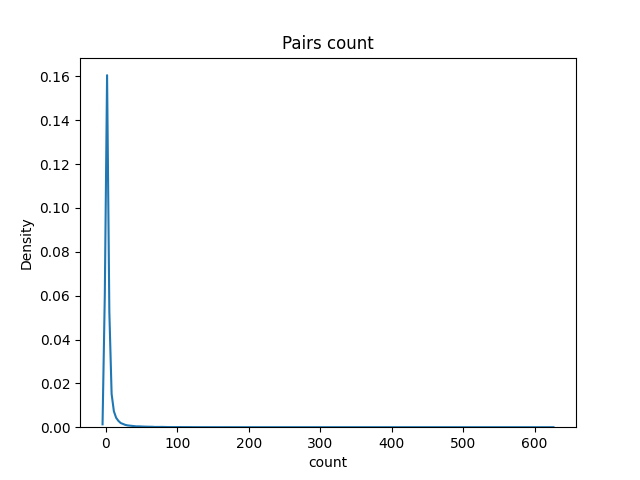

In [42]:
Image(filename='../part1/script_output/sampled_sentences_stats/pairs_count.png')

The occurrences of the paired labels can be visualized using a heatmap. For instance, it can be observed that pairs labeled as GPE-GPE (geopolitical entities) are the most common.

Other frequent combinations include: GPE-LOC (geopolitical entity - location), GPE-ORG (geopolitical entity - organization), GPE-PERSON, LOC-LOC (location - location), ORG-ORG (organization - organization), ORG-PERSON, and PERSON-PERSON.

Note: In this context, each pair is counted twice due to the symmetric nature of the relation. For example, a pair consisting of GPE and PERSON will be counted once as (GPE, PERSON) and then again as (PERSON, GPE).

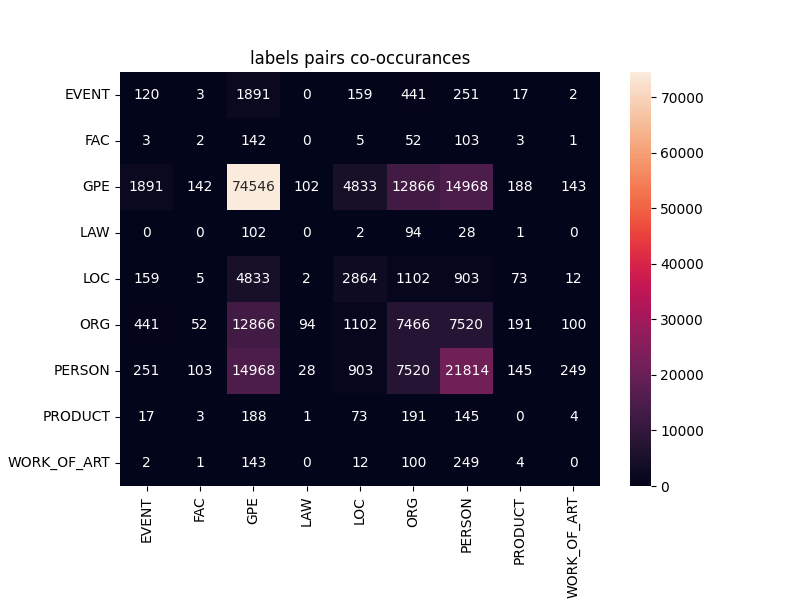

In [43]:
Image(filename='../part1/script_output/sampled_sentences_stats/pairs_labels_count.png')

## Part 3: Exploring the Mutual Information (MI) Score

### Exploring the MI for the entire dataset

The mutual information (MI) analysis also reveals a clear power-law distribution. It is apparent that lower MI values occur frequently, indicating a lower level of relationship between the entities. Conversely, entities with a higher level of relationship are less common.

In [44]:
dataset_path = '../part1/script_output/data.csv'
df = pd.read_csv(dataset_path)

In [45]:
df['mi_score'].describe()

count    1.000000e+05
mean     7.615506e-05
std      2.048076e-04
min     -2.594273e-05
25%      1.082379e-07
50%      6.816535e-06
75%      5.274713e-05
max      1.483899e-03
Name: mi_score, dtype: float64

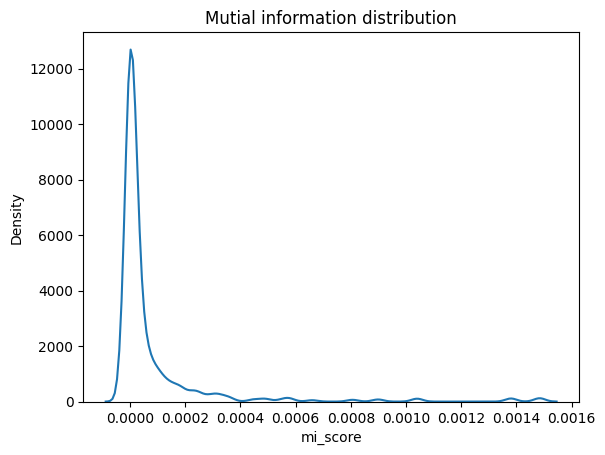

In [46]:
sns.kdeplot(data=df['mi_score'])
plt.title('Mutial information distribution');

In [61]:
sorted_df = df.sort_values(by='mi_score', ascending=False)

In [48]:
print(f'Pair with negative MI (joint probability < the product of the individual probabilities) so the variables are less dependent: {(len(df[df["mi_score"] < 0])/len(df)) :.2%}')
print(f'Pair with positive MI: {(len(df[df["mi_score"] > 0])/len(df)) :.2%}')
print(f'Pair with 0 MI: {(len(df[df["mi_score"] == 0])/len(df)) :.2%}')

Pair with negative MI (joint probability < the product of the individual probabilities) so the variables are less dependent: 22.90%
Pair with positive MI: 77.10%
Pair with 0 MI: 0.00%


The 5 pairs with highest MI score:

In [62]:
sorted_df.head(5)

,sent_id,sent,masked_sent,ent1,label1,ent2,label2,mi_score
31328,885751,Scully arrives and holds Peterson at gunpoint ...,[MASK] arrives and holds Peterson at gunpoint ...,Scully,PERSON,Mulder,PERSON,0.001484
67771,1909689,As a reluctant Scully is about to give in to a...,As a reluctant [MASK] is about to give in to a...,Scully,PERSON,Mulder,PERSON,0.001484
6945,210011,""" Mulder and Scully "" ( The Ex @-@ Files mix )...",""" [MASK] and [MASK] "" ( The Ex @-@ Files mix )...",Mulder,PERSON,Scully,PERSON,0.001484
19600,554913,"Meanwhile , Scully calls Mulder to tell him th...","Meanwhile , [MASK] calls [MASK] to tell him th...",Scully,PERSON,Mulder,PERSON,0.001484
19599,554911,Mulder calls Scully and asks her to find past ...,[MASK] calls [MASK] and asks her to find past ...,Mulder,PERSON,Scully,PERSON,0.001484


The 5 pairs with lowest MI score:

In [63]:
sorted_df.tail(5)

,sent_id,sent,masked_sent,ent1,label1,ent2,label2,mi_score
54929,1546971,"The Halloween franchise , when compared to the...","The Halloween franchise , when compared to the...",@-@,PERSON,the United States,GPE,-0.000026
17389,494366,"Their efforts included a campaign entitled "" S...","Their efforts included a campaign entitled "" S...",the United States,GPE,@-@,PERSON,-0.000026
76875,2175947,How I Spent My Vacation was the first direct @...,How I Spent My Vacation was the first direct [...,@-@,PERSON,the United States,GPE,-0.000026
99531,2823263,For many years Harris claimed to have been the...,For many years Harris claimed to have been the...,@-@,PERSON,the United States,GPE,-0.000026
61433,1726389,"This time , she picked up President @-@ elect ...","This time , she picked up President [MASK] ele...",@-@,PERSON,the United States,GPE,-0.000026


### Exploring the MI for each labels-pair

I decided to display only the top 8 label pairs in the dataset for mutual information (MI) analysis. As expected, we often observe a power-law distribution, with an additional cluster representing the pairs that frequently appeared together.

In [49]:
def plot_type_mi_KDE_plot(df, type1, type2):
    df1 = df[( (df['label1'] == type1) & (df['label2'] == type2) ) | ( (df['label2'] == type1) & (df['label1'] == type2) )]
    sns.kdeplot(data=df1['mi_score'])
    plt.title(f'Mutial information distribution for labels: {type1}-{type2}')
    print(df1['mi_score'].describe())

count    37273.000000
mean         0.000097
std          0.000205
min         -0.000022
25%          0.000003
50%          0.000027
75%          0.000103
max          0.001380
Name: mi_score, dtype: float64


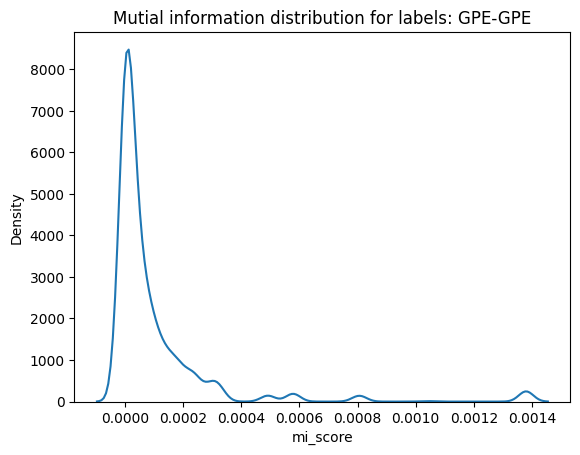

In [50]:
plot_type_mi_KDE_plot(df, 'GPE', 'GPE')

count    4.833000e+03
mean     3.717897e-05
std      7.725245e-05
min     -8.546667e-06
25%      3.175058e-07
50%      7.396958e-06
75%      3.048646e-05
max      3.592448e-04
Name: mi_score, dtype: float64


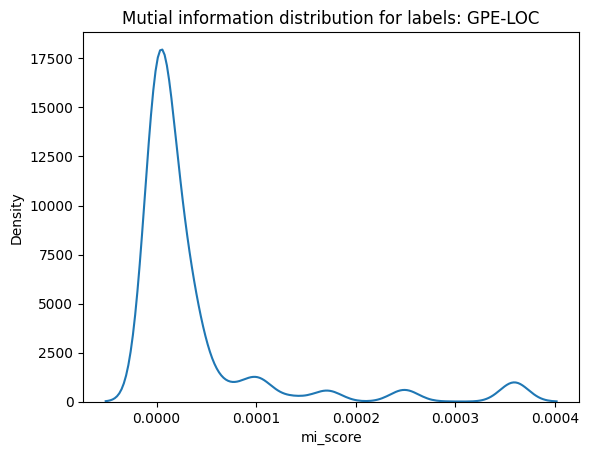

In [51]:
plot_type_mi_KDE_plot(df, 'GPE', 'LOC')

count    1.286600e+04
mean     7.622889e-05
std      2.171357e-04
min     -2.440967e-05
25%     -1.747379e-07
50%      1.773267e-06
75%      2.121738e-05
max      1.040287e-03
Name: mi_score, dtype: float64


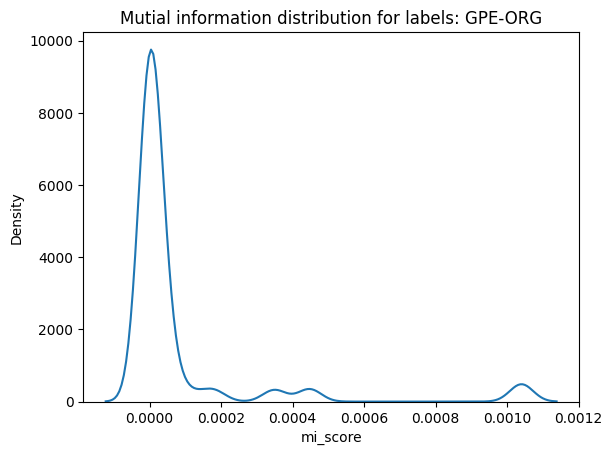

In [52]:
plot_type_mi_KDE_plot(df, 'GPE', 'ORG')

count    1.496800e+04
mean     8.389553e-06
std      2.340798e-05
min     -2.594273e-05
25%     -4.792437e-07
50%      2.708958e-07
75%      5.583406e-06
max      3.495110e-04
Name: mi_score, dtype: float64


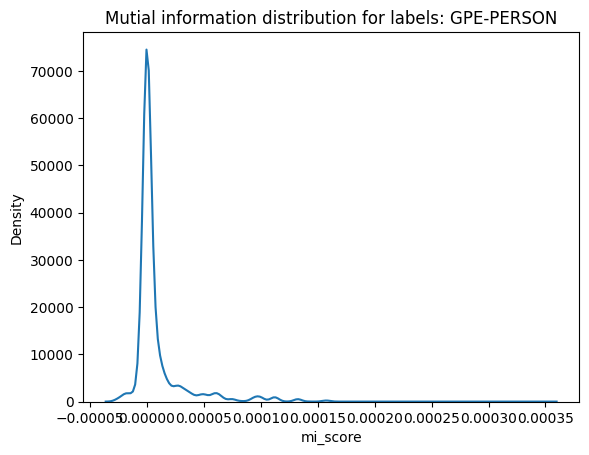

In [53]:
plot_type_mi_KDE_plot(df, 'GPE', 'PERSON')

count    1432.000000
mean        0.000324
std         0.000365
min        -0.000002
25%         0.000036
50%         0.000111
75%         0.000899
max         0.000899
Name: mi_score, dtype: float64


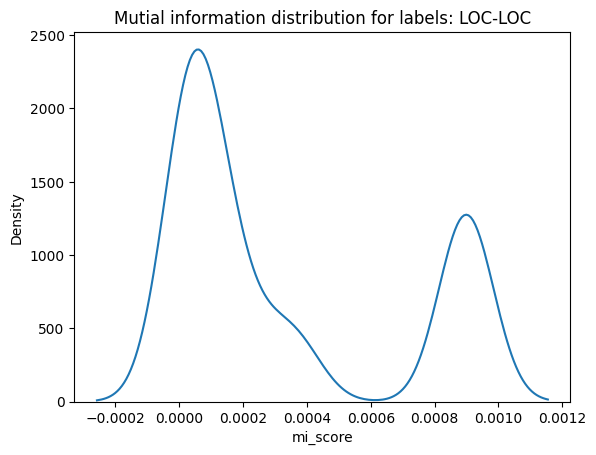

In [54]:
plot_type_mi_KDE_plot(df, 'LOC', 'LOC')

count    3.733000e+03
mean     4.428500e-05
std      7.066385e-05
min     -1.566918e-06
25%      7.368485e-07
50%      8.858982e-06
75%      5.746273e-05
max      2.918908e-04
Name: mi_score, dtype: float64


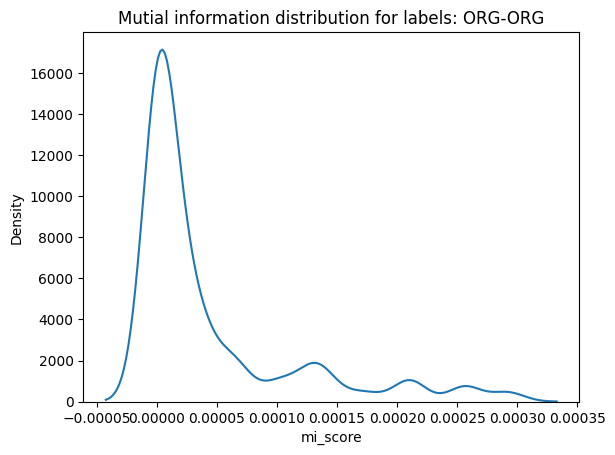

In [55]:
plot_type_mi_KDE_plot(df, 'ORG', 'ORG')

count    7.520000e+03
mean     1.501903e-05
std      4.240260e-05
min     -4.985378e-06
25%      7.505374e-08
50%      1.948208e-06
75%      1.208292e-05
max      1.040287e-03
Name: mi_score, dtype: float64


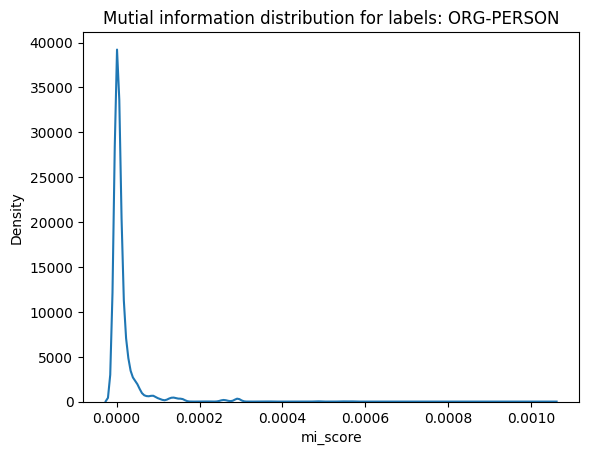

In [56]:
plot_type_mi_KDE_plot(df, 'ORG', 'PERSON')

count    1.090700e+04
mean     1.637895e-04
std      3.601662e-04
min     -4.479476e-06
25%      7.256795e-07
50%      1.155445e-05
75%      1.112962e-04
max      1.483899e-03
Name: mi_score, dtype: float64


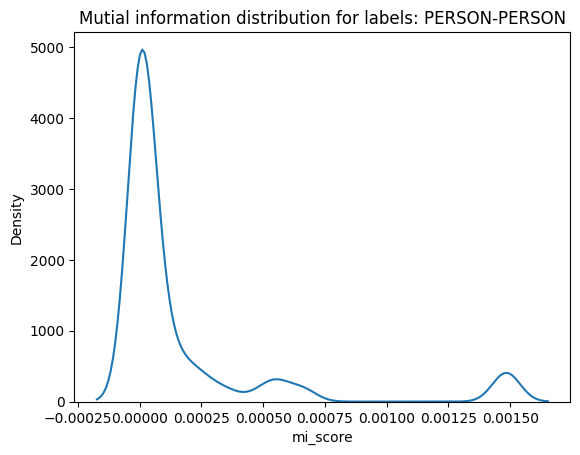

In [57]:
plot_type_mi_KDE_plot(df, 'PERSON', 'PERSON')